In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp

In [5]:
from toy_problems import QuickUnion

In [6]:
n = 50

In [81]:
pgrid = np.random.randint(0, 2, (n, n))
pgrid.shape

(50, 50)

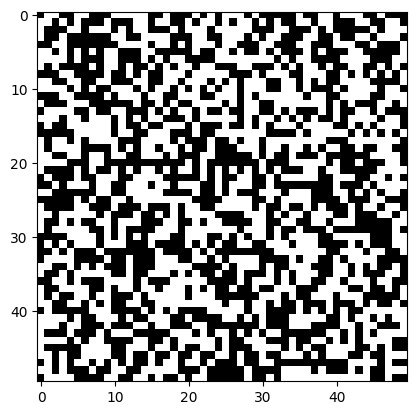

In [82]:
plt.imshow(pgrid, cmap='gray')

In [7]:
x = np.linspace(0, 3, 20)
f = 2*np.exp(-2*x)
F = 1-np.exp(-2*x)

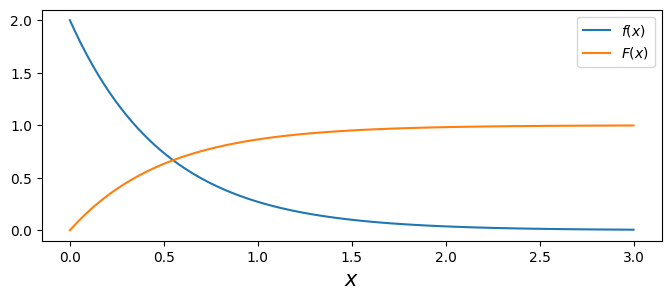

In [8]:
plt.figure(figsize=(8, 3))
plt.plot(x, f, label=f'$f(x)$')
plt.plot(x, F, label=f'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=15)
plt.legend()
plt.show()

In [8]:
Us = np.random.rand(400)
F_inv_Us = -np.log(1-Us)/2

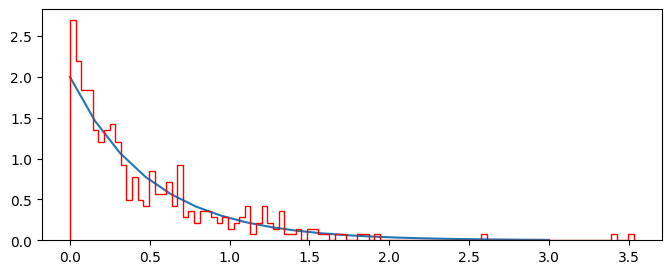

In [9]:
plt.figure(figsize=(8, 3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', bins=100, density='norm', label=r'$F^{-1}(U)$')
plt.show()

In [10]:
rs = np.reshape(F_inv_Us, (20,-1))

In [11]:
pgrid = rs < 0.5

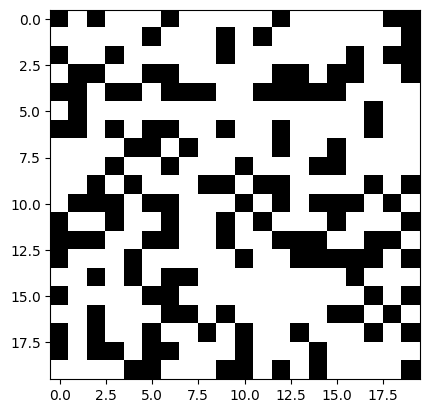

In [12]:
plt.imshow(pgrid, cmap='gray')

In [73]:
pgrid_solv = np.zeros((len(pgrid), len(pgrid), 3))
pgrid_solv.shape

(20, 20, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[False  True False  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True False False]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ True  True  True  True  True False  True  True  True False  True False
  True  True  True  True  True  True  True False]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[False  True  True False  True  True  True  True  True False  True  True
  True  True  True  True False  True False False]
[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[ True False False  True  True False False  True  True  True  True  True
 False False  True False False  True  True False]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
[False False  True False False  True False False False  True  True False
 False False False False  True  True  True  True]
[80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ True False  True  True  True  True  True  True  True  True  True  True
  

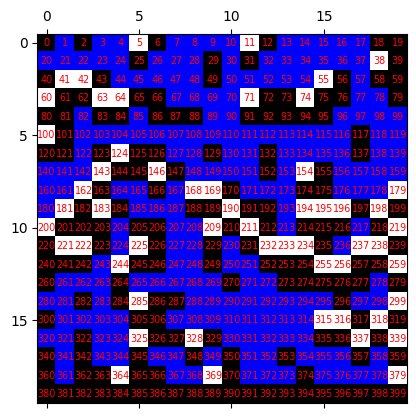

<Figure size 2000x2000 with 0 Axes>

In [78]:
uf = QuickUnion(400)
idx_grid = np.arange(pgrid.shape[0]**2).reshape(pgrid.shape[0], -1)

for irow in range(0, pgrid.shape[0]):
    print(pgrid[irow])
    print(idx_grid[irow])
    if irow == pgrid.shape[0] - 1:
        break
    p_row = pgrid[irow]
    p_i_row = idx_grid[irow]
    q_row = pgrid[irow + 1]
    q_i_row = idx_grid[irow + 1]

    for i, p in enumerate(p_i_row):
        # print("irow: {}, i: {}, p: {}".format(irow, i, p))
        # if the cell is not open, skip
        if not p_row[i]:
            pgrid_solv[irow, i] = (0, 0, 0)
            continue
    
        # if the cell below is open, connect
        if q_row[i]:
            uf.union(p, q_i_row[i])
            pgrid_solv[irow, i] = (0, 0, 255)
            
            # keep connecting left and right until we find a closed cell
            l = i - 1
            r = i + 1
            while l >= 0 and p_row[l]:
                uf.union(p, p_i_row[l])
                pgrid_solv[irow, l] = (0, 0, 255)
                l -= 1
            while r < len(p_row) and p_row[r]:
                uf.union(p, p_i_row[r])
                pgrid_solv[irow, r] = (0, 0, 255)
                r += 1
        elif not q_row[i]:
            pgrid_solv[irow, i] = (255, 255, 255)

fig, ax = plt.subplots()
plt.figure(figsize=(20, 20))
ax.matshow(pgrid_solv)
for p, x in np.ndenumerate(idx_grid):
    ax.text(p[1], p[0], x, color="red", size="x-small", va='center', ha='center')
plt.show()

In [77]:
uf.connected(10, 214)

False